# IntilaQ - Data Science Academy
Instructor: Mohamed Karim Bouaziz (DATASCAI)

### Import libraries

In [0]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline  

### Data visualisation

In [2]:
# import data
from google.colab import files
uploaded = files.upload()

Saving AI101.txt to AI101.txt


In [3]:
df=pd.read_csv('AI101.txt', header=None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [16]:
df.shape

(97, 2)

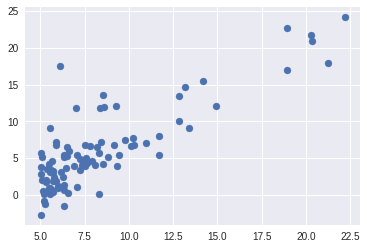

In [4]:
# visualise data
plt.scatter(df[0], df[1], cmap='coolwarm')

In [0]:
#x = np.c_[np.ones(df.shape[0]),df[0]]
x = df[0].values
y = (df[1].values)

### Python Native Non Vectorized

**Linear regression hypothesis** $$ \widehat{y} = h_{\theta}(x) = \theta_{0}+\theta_{1}x$$
**Cost function** $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^{2} $$

In [0]:
def computeCostNonVectorised(X, y, theta0,theta1):
    m=X.shape[0]
    h=theta0+theta1*X
    j=(1/(2*m))*np.sum(((h-y)**2))
    return(j)

**Partial derivative** 
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}) $$
$$ \frac{\partial J(\theta)}{\partial\theta_{1}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x^{(i)} $$
**Gradient Descent** 
$$ \theta_{0} = \theta_{0} -\alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}) $$
$$ \theta_{1} = \theta_{1} -\alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x^{(i)} $$

In [0]:
def gradientDescentNonVectorised(X, y,  theta0,theta1, alpha=0.01, num_iters=1500):
    J_history=[]
    m=X.shape[0]
    for j in range(num_iters):
      h=theta0+theta1*X
      d_th0=(1/m)*np.sum(h-y)
      d_th1=(1/m)*np.sum((h-y)*X)
      theta0=theta0-alpha*d_th0
      theta1=theta1-alpha*d_th1
      J_history.append(computeCostNonVectorised(X, y, theta0,theta1))
    return(theta0,theta1, J_history)

In [127]:
# theta for minimized cost J
theta0_nv=0.0
theta1_nv=0.0
theta0_nv,theta1_nv , cost_J_nv = gradientDescentNonVectorised(X=x, y=y,theta0=theta0_nv,theta1=theta1_nv)
print(u"Python Native Non Vectorised: \u03980 = %s ; \u03981 = %s" % (theta0_nv,theta1_nv))
print(u"Correct result: \u03980 = -3.6302914394 ; \u03981 = 1.16636235034")

Python Native Non Vectorised: Θ0 = -3.6302914394043606 ; Θ1 = 1.166362350335582
Correct result: Θ0 = -3.6302914394 ; Θ1 = 1.16636235034


### Python Native Vectorized

**Linear regression hypothesis** $$ \widehat{y} = h_{\theta}(X) = \theta^{T}X$$
**Cost function** $$ J(\theta) = \frac{1}{2m} \sum (h_{\theta}(X)-y)^{2} $$

In [0]:
x_bi = np.c_[np.ones(df.shape[0]),df[0].values]
y=y.reshape(1,-1).T

In [0]:
def computeCost(X, y, theta):
    m=X.shape[0]
    h=np.dot(X, theta)
    J=(1/(2*m))*np.sum((h-y)**2)
    return(J)

**Partial derivative** $$ \frac{\partial J(\theta)}{\partial\theta} = \frac{1}{m} X^T(h_\theta(X)-y)$$
**Gradient Descent** $$ \theta = \theta -\alpha \frac{1}{m} X^T(h_\theta(X)-y)$$

In [0]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    J_history=[]
    m=X.shape[0]
    for j in range(num_iters):
      h=np.dot(X,theta)
      d_th=(1/m)*np.dot(X.T, (h-y))
      theta=theta-alpha*d_th
      J_history.append(computeCost(X, y, theta))

    return(theta, J_history)

In [132]:
# theta for minimized cost J
theta_v=np.zeros((x_bi.shape[1],1)) # X.shape[1] = 2 (theta0, theta1)
theta_v , cost_J_v = gradientDescent(x_bi, y,theta=theta_v)
print(u"Python Native Vectorised: \u03980 = %s ; \u03981 = %s" % (theta_v[0],theta_v[1]))
print(u"Correct result: \u03980 = [-3.63029144] ; \u03981 = [ 1.16636235]")

Python Native Vectorised: Θ0 = [-3.63029144] ; Θ1 = [1.16636235]
Correct result: Θ0 = [-3.63029144] ; Θ1 = [ 1.16636235]


### Benchmark

Python Native Non Vectorised: Θ0 = -3.6302914394043606 ; Θ1 = 1.166362350335582
Python Native Vectorised: Θ0 = [-3.63029144] ; Θ1 = [1.16636235]


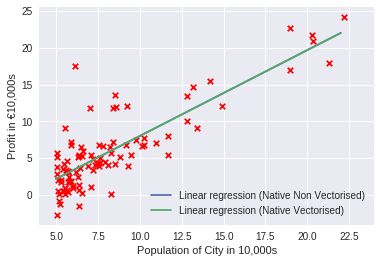

In [110]:
x0 = np.arange(5,23)

### Python Native Non Vectorised
y0 = theta0_nv+theta1_nv*x0
print(u"Python Native Non Vectorised: \u03980 = %s ; \u03981 = %s" % (theta0_nv,theta1_nv))

### Python Native Vectorised
y1 = theta_v[0]+theta_v[1]*x0
print(u"Python Native Vectorised: \u03980 = %s ; \u03981 = %s" % (theta_v[0],theta_v[1]))

## Plot
plt.scatter(x_bi[:,1], y, s=30, c='r', marker='x', linewidths=1)
# Plot Python Native Non Vectorised
plt.plot(x0,y0, label='Linear regression (Native Non Vectorised)')
# Plot Python Native Vectorised
plt.plot(x0,y1, label='Linear regression (Native Vectorised)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel(u'Profit in €10,000s')
plt.legend(loc=4);

### Plot result Cost function  $J(\theta_0,\theta_1)$

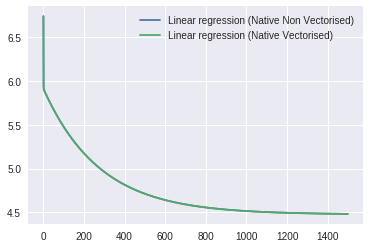

In [133]:
x_cost=range(1500)
plt.plot(x_cost, cost_J_nv, label='Linear regression (Native Non Vectorised)')
plt.plot(x_cost, cost_J_v, label='Linear regression (Native Vectorised)')
plt.legend(loc=1);